# Predcting Prices with Machine Learning

 One of the uses of machine learning in companies is for predict the sales price, I used this dataset to predict the houses sales price in the King Country region. I used regression, regularization and boosting algorithms for the predictions.

## Libraries used for the model

In [7]:
# Libraries used for the model

import numpy as np  #linear algebra 
import pandas as pd #data processing, 

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Model selection and evaluation 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Model libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# load dataset 
house_sales = pd.read_csv( 'kc_house_data.csv')

## EDA House Sales Prediction DataSet

The features of the datasetare as follows:

- id: house id<br>
- date: date that the house was bought.<br>
- price: house price<br>
- bedrooms: number of bedroom<br>
- bathrooms: number of bathroom<br>
- sqft_living: Square foot Living<br>
- sqft_lot: Square foot Lot<br>
- floors: Number of floor<br>
- waterfront: waterfront<br>
- view: Number of view<br>
- condition: condition<br>
- grade: grade<br>
- sqft_above: Square foot above<br>
- sqft_basement: Square foot basement<br>
- yr_built: year that house was built<br>
- yr_renovated: year that house was renovated<br>
- zipcode: zipcode<br>
- lat: latitude<br>
- long: longitude<br>
- sqft_living15: Square foot Living in 2015<br>
- sqft_lot15: Square foot Lot in 2015<br>

In [11]:
house_sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
house_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### In this dataset: 

- It has 21,613 house information;
- it has 21 features;
- 5 features (price, bathrooms, floors, lat, and long) are float64 type;
- 15 features (id, bedrooms, sqft_living, sqft_lot, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, sqft_living15, sqft_lot15) are int64 type;
- 1 feature (object) is object type;
- There isn't null all feature.

#### In the correlation matrix below

In general we can see a positive relatioship between price and other features. There is only two features that has a negative relationship with the price.

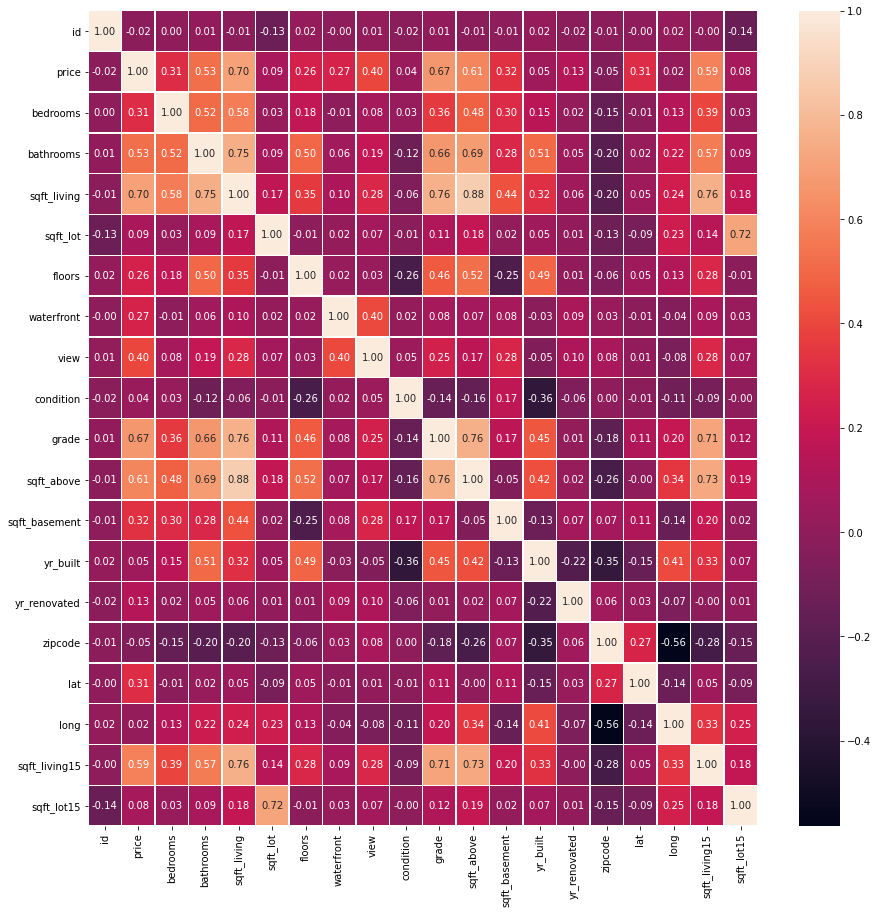

In [13]:
f, ax = plt.subplots (figsize = (15, 15))
sns.heatmap (house_sales.corr(), annot=True, fmt = ".2f",linewidths
             = .5, ax=ax)
plt.show()

## Visualization

I plotted some visualizations to get an idea of the layout of our data and to identify possible outliers

/Users/marcoscarvalho/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


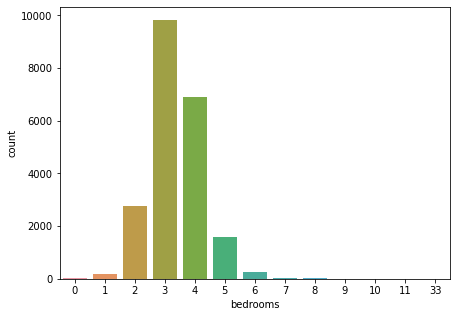

In [15]:
plt.subplots(figsize=(7, 5))
sns.countplot(house_sales['bedrooms'])
plt.show()

/Users/marcoscarvalho/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


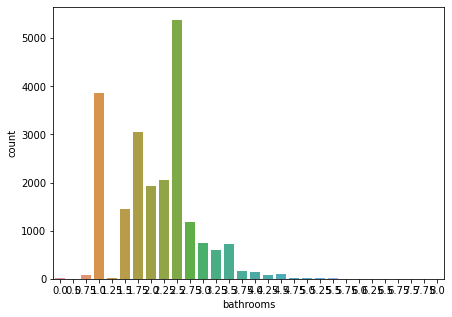

In [16]:
plt.subplots(figsize=(7, 5))
sns.countplot(house_sales['bathrooms'])
plt.show()

/Users/marcoscarvalho/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


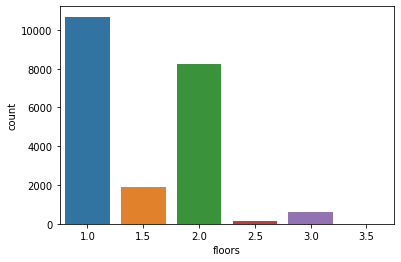

In [18]:
sns.countplot(house_sales["floors"])
plt.show()

/Users/marcoscarvalho/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


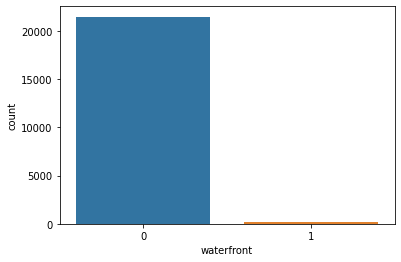

In [19]:
sns.countplot(house_sales["waterfront"])
plt.show()

/Users/marcoscarvalho/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


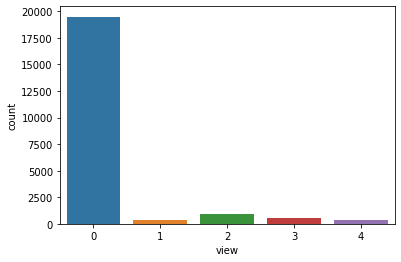

In [20]:
sns.countplot(house_sales["view"])
plt.show()

/Users/marcoscarvalho/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


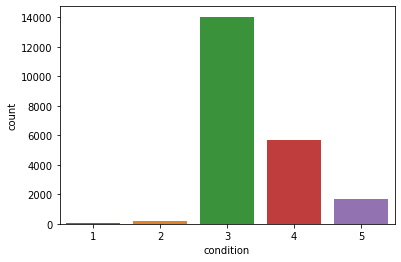

In [21]:
sns.countplot(house_sales["condition"])
plt.show()

/Users/marcoscarvalho/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


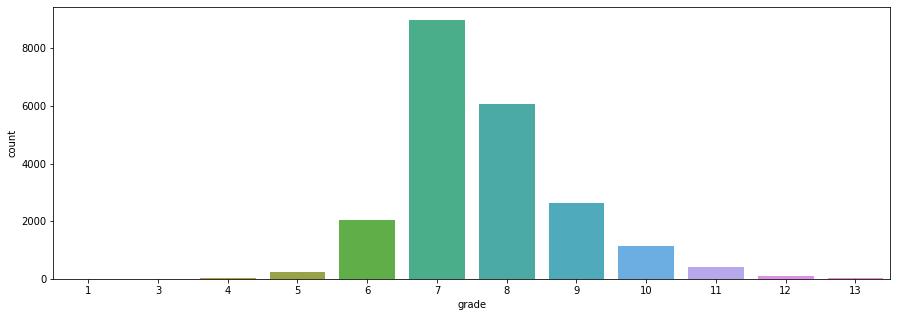

In [22]:
plt.subplots(figsize=(15, 5))
sns.countplot(house_sales["grade"])
plt.show()

## Data train and test Split

- I splitted the dataset in train and test, being 80% train data and 20% test data.

In [33]:
model = []
score = []
x_train, x_test, y_train, y_test = train_test_split(house_sales.drop(["id","date","price","zipcode"],axis=1),house_sales["price"],test_size=0.2,random_state=42)
print("X Train Shape", x_train.shape)
print("Y Train Shape", y_train.shape)
print("X Test Shape", x_test.shape)
print("Y Test Shape", y_test.shape)

X Train Shape (17290, 17)
Y Train Shape (17290,)
X Test Shape (4323, 17)
Y Test Shape (4323,)


## Create and Evaluation Model

I compared regression models in order to find the best model. In this dataset I used to regression model in below:

- Multilinear Regression<br>
- Ridge Regression<br>
- Lasso Regression<br>
- Elastic Net Regression<br>
- Decision Tree Regression<br>
- Random Forest Regression<br>
- Ada Boosting Regression<br>
- Gradient Boosting Regression<br>
- XGBoosting Regression

In [34]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
linear_model_predict = linear_model.predict(x_test)
print("Score: ",r2_score(linear_model_predict,y_test))
model.append("Multi Linear Regression")
score.append(r2_score(linear_model_predict,y_test))

Score:  0.5429352326138008


In [35]:
ridge_model = Ridge()
ridge_model.fit(x_train,y_train)
ridge_model_predict = ridge_model.predict(x_test)
print("Score: ",r2_score(ridge_model_predict,y_test))
model.append("Ridge Regression")
score.append(r2_score(ridge_model_predict,y_test))

Score:  0.5423900426586872


In [36]:
lasso_model = Lasso()
lasso_model.fit(x_train,y_train)
lasso_model_predict = lasso_model.predict(x_test)
print("Score: ",r2_score(lasso_model_predict,y_test))
model.append("Lasso Regression")
score.append(r2_score(lasso_model_predict,y_test))

Score:  0.5429143335998352


/Users/marcoscarvalho/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 312438581762300.9, tolerance: 225891453177.81256
  model = cd_fast.enet_coordinate_descent(


In [37]:
elasticnet_model = ElasticNet()
elasticnet_model.fit(x_train,y_train)
elasticnet_model_predict = elasticnet_model.predict(x_test)
print("Score: ",r2_score(elasticnet_model_predict,y_test))
model.append("Elastic Net Regression")
score.append(r2_score(elasticnet_model_predict,y_test))

Score:  0.29389589521319015


/Users/marcoscarvalho/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456781214323700.5, tolerance: 225891453177.81256
  model = cd_fast.enet_coordinate_descent(


In [38]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)
tree_reg_predict = tree_reg.predict(x_test)
print("Score: ",r2_score(tree_reg_predict,y_test))
model.append("Decision Tree Regression")
score.append(r2_score(tree_reg_predict,y_test))

Score:  0.7558282847423237


In [39]:
reg = RandomForestRegressor(n_estimators=100, random_state = 42)
reg.fit(x_train,y_train)
reg_predict = reg.predict(x_test)
print("Score: ",r2_score(reg_predict,y_test))
model.append("Random Forest Regression")
score.append(r2_score(reg_predict,y_test))

Score:  0.8354246331642108


In [40]:
reg_ada = AdaBoostRegressor(random_state=0, n_estimators=5)
reg_ada.fit(x_train,y_train)
reg_ada_predict = reg_ada.predict(x_test)
print("Score: ",r2_score(reg_ada_predict,y_test))
model.append("Ada Boost Regression")
score.append(r2_score(reg_ada_predict,y_test))

Score:  0.5517292712631698


In [41]:
reg_gb = GradientBoostingRegressor()
reg_gb.fit(x_train,y_train)
reg_gb_predict = reg_gb.predict(x_test)
print("Score: ",r2_score(reg_gb_predict,y_test))
model.append("Gradient Boosting Regression")
score.append(r2_score(reg_gb_predict,y_test))

Score:  0.8225098905894168


In [42]:
reg_xgb = XGBRegressor()
reg_xgb.fit(x_train,y_train)
reg_xgb_predict = reg_xgb.predict(x_test)
print("Score: ",r2_score(reg_xgb_predict,y_test))
model.append("XGBoost Regression")
score.append(r2_score(reg_xgb_predict,y_test))

Score:  0.8663023483506056


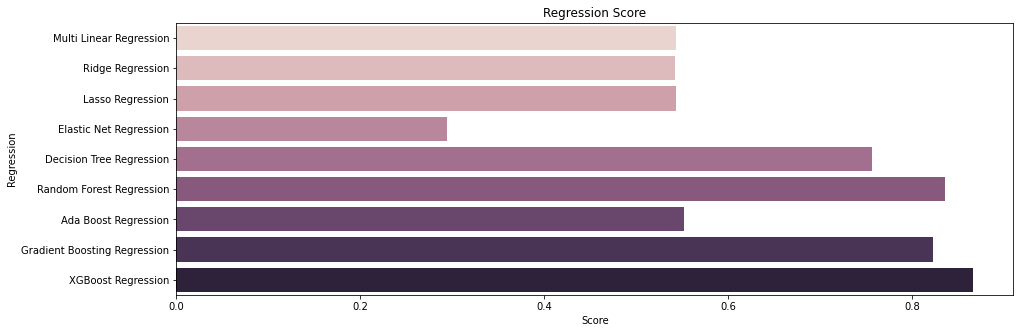

In [43]:
plt.subplots(figsize=(15, 5))
sns.barplot(x=score,y=model,palette = sns.cubehelix_palette(len(score)))
plt.xlabel("Score")
plt.ylabel("Regression")
plt.title('Regression Score')
plt.show()

## Conclusion 

According to result, the best model can set up XGBoost regression algorithm. XGBoost achieved 86% successful. Elastic Net, which is regulaziton regression algorithm, aren't convenient to the dataset. I believe that dataset and model could be improved. You may see my prediction below: 

In [44]:
#set ids as Id and predict survival 
ids = house_sales['id']
predict = reg_xgb.predict(house_sales.drop(["id","date","price","zipcode"],axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'HouseID' : ids, 'Price': predict})
output.to_csv('submission.csv', index=False)

In [47]:
prediction = pd.read_csv( 'submission.csv')
prediction.head(20)

,HouseID,Price
0,7129300520,241930.27
1,6414100192,514640.34
2,5631500400,202398.78
3,2487200875,452241.30
4,1954400510,496462.88
5,7237550310,1233640.40
6,1321400060,266410.78
7,2008000270,208115.36
8,2414600126,292237.12
9,3793500160,332960.03
